In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from typing import Dict


data_train = pd.read_parquet('../data/TSLA/OCHLV/train.parquet')
data_test = pd.read_parquet('../data/TSLA/OCHLV/test.parquet')
data = pd.concat([data_train, data_test], axis=0)

# Raw dataset statistics and plots

In [2]:
data.describe(include='all')

,date,time,market_second,symbol,open,high,low,close,volume
count,12003082,12003082,1.200308e+07,12003082,1.200308e+07,1.200308e+07,1.200308e+07,1.200308e+07,1.200308e+07
unique,1256,23401,NaN,1,NaN,NaN,NaN,NaN,NaN
top,2024-04-29,14:30:00,NaN,TSLA,NaN,NaN,NaN,NaN,NaN
freq,18281,1216,NaN,12003082,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.597001e+04,NaN,4.938630e+02,4.939091e+02,4.938138e+02,4.938614e+02,5.703292e+02
std,NaN,NaN,5.707458e+03,NaN,3.556055e+02,3.556432e+02,3.555647e+02,3.556042e+02,5.681494e+03
min,NaN,NaN,0.000000e+00,NaN,1.012300e+02,1.012300e+02,1.012100e+02,1.012100e+02,1.000000e+00
25%,NaN,NaN,1.338900e+04,NaN,2.166700e+02,2.166900e+02,2.166500e+02,2.166700e+02,2.700000e+01
50%,NaN,NaN,1.732900e+04,NaN,3.389000e+02,3.389400e+02,3.388700e+02,3.389000e+02,1.450000e+02
75%,NaN,NaN,2.029500e+04,NaN,7.238900e+02,7.239600e+02,7.238200e+02,7.238900e+02,4.860000e+02


In [3]:
print(f"Min date: {data['date'].min()}")
print(f"Max date: {data['date'].max()}\n")

print(f'Number of rows: {len(data)}\n')

print(f"Minimum open price: {data['open'].min()}")
print(f"Average open price: {data['open'].mean()}")
print(f"Maximum open price: {data['open'].max()}\n")

print(f"Minimum close price: {data['close'].min()}")
print(f"Average close price: {data['close'].mean()}")
print(f"Maximum close price: {data['close'].max()}\n")

print(f"Minimum high price: {data['high'].min()}")
print(f"Average high price: {data['high'].mean()}")
print(f"Maximum high price: {data['high'].max()}\n")

print(f"Minimum low price: {data['low'].min()}")
print(f"Average low price: {data['low'].mean()}")
print(f"Maximum low price: {data['low'].max()}\n")

print(f"Minimum volume: {data['volume'].min()}")
print(f"Average volume: {data['volume'].mean()}")
print(f"Maximum volume: {data['volume'].max()}\n")

Min date: 2020-03-30
Max date: 2025-03-27

Number of rows: 12003082

Minimum open price: 101.23
Average open price: 493.86304872281994
Maximum open price: 2318.23

Minimum close price: 101.21
Average close price: 493.8614468004957
Maximum close price: 2318.72

Minimum high price: 101.23
Average high price: 493.9091351912786
Maximum high price: 2318.8

Minimum low price: 101.21
Average low price: 493.81377846831356
Maximum low price: 2317.62

Minimum volume: 1
Average volume: 570.329154878722
Maximum volume: 3984492



In [4]:
sec_per_obs = data['market_second'].diff()[data['market_second'].diff() > 0].mean()
print(f'Average seconds between observations: {sec_per_obs}')

Average seconds between observations: 2.447151791735691


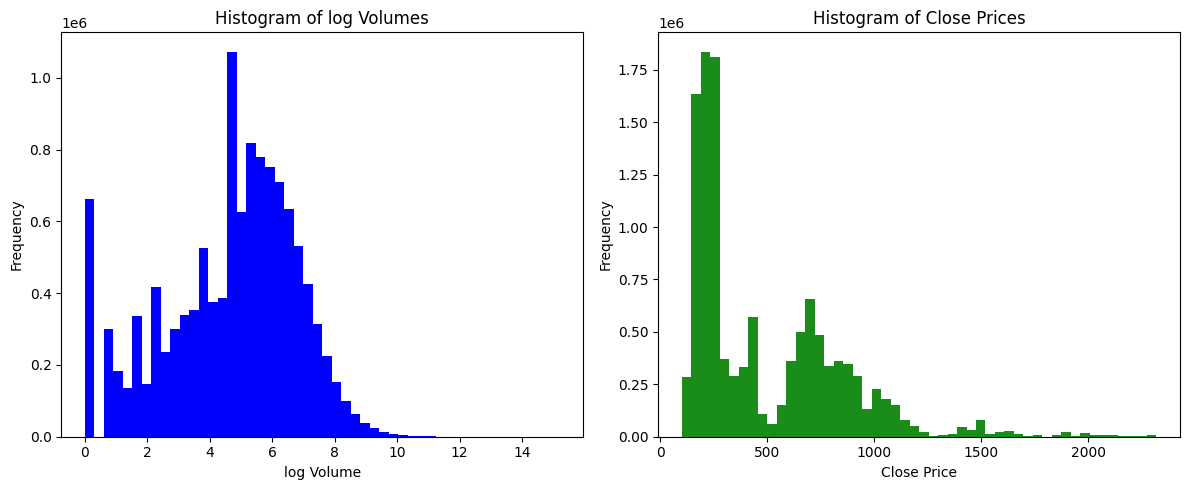

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(np.log(data['volume']), bins=50, color='blue')
axes[0].set_title('Histogram of log Volumes')
axes[0].set_xlabel('log Volume')
axes[0].set_ylabel('Frequency')

axes[1].hist(data['close'], bins=50, color='green', alpha=0.9)
axes[1].set_title('Histogram of Close Prices')
axes[1].set_xlabel('Close Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

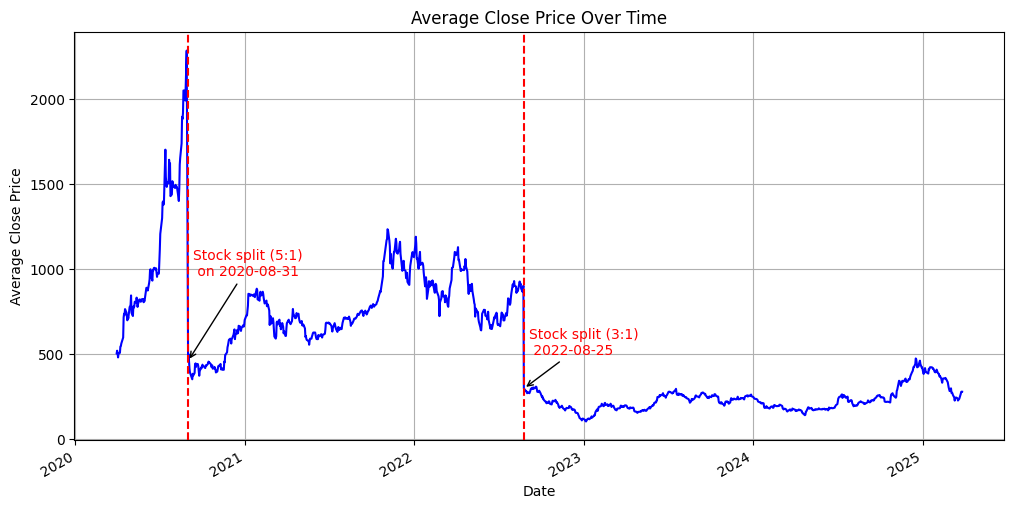

In [6]:
data['date'] = pd.to_datetime(data['date'])

average_close = data.groupby('date')['close'].mean()

plt.figure(figsize=(12, 6))
average_close.plot(
    title='Average Close Price Over Time',
    xlabel='Date',
    ylabel='Average Close Price',
    color='blue',
)

stock_split_date = pd.to_datetime('2022-08-25')
plt.axvline(x=stock_split_date, color='red', linestyle='--')
plt.annotate(
    'Stock split (3:1) \n 2022-08-25',
    xy=(stock_split_date, average_close.loc[stock_split_date]),
    xytext=(
        stock_split_date + pd.Timedelta(days=10),
        average_close.loc[stock_split_date] + 200,
    ),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    color='red',
)

stock_split_date_2 = pd.to_datetime('2020-08-31')
plt.axvline(x=stock_split_date_2, color='red', linestyle='--')
plt.annotate(
    'Stock split (5:1) \n on 2020-08-31',
    xy=(stock_split_date_2, average_close.loc[stock_split_date_2]),
    xytext=(
        stock_split_date_2 + pd.Timedelta(days=10),
        average_close.loc[stock_split_date_2] + 500,
    ),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    color='red',
)

plt.grid()
plt.show()

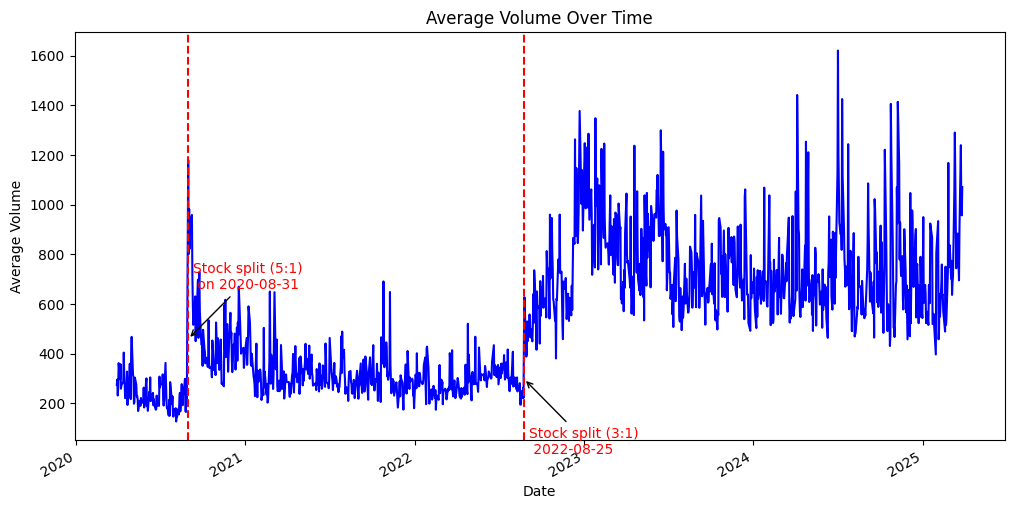

In [7]:
data['date'] = pd.to_datetime(data['date'])

average_vol = data.groupby('date')['volume'].mean()

plt.figure(figsize=(12, 6))
average_vol.plot(
    title='Average Volume Over Time',
    xlabel='Date',
    ylabel='Average Volume',
    color='blue',
)

plt.axvline(x=stock_split_date, color='red', linestyle='--')
plt.annotate(
    'Stock split (3:1) \n 2022-08-25',
    xy=(stock_split_date, average_close.loc[stock_split_date]),
    xytext=(
        stock_split_date + pd.Timedelta(days=10),
        average_close.loc[stock_split_date] - 300,
    ),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    color='red',
)

plt.axvline(x=stock_split_date_2, color='red', linestyle='--')
plt.annotate(
    'Stock split (5:1) \n on 2020-08-31',
    xy=(stock_split_date_2, average_close.loc[stock_split_date_2]),
    xytext=(
        stock_split_date_2 + pd.Timedelta(days=10),
        average_close.loc[stock_split_date_2] + 200,
    ),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    color='red',
)

plt.show()

# Features statistics and plots

In [10]:
import sys
from pathlib import Path

sys.path.append('..')  # Moves up one directory to include TradeRL as a package
sys.path.append(str(Path().resolve()))

In [11]:
import argparse

from trade_rl.run import run
from trade_rl.util.args import parse_args
from trade_rl.util.logging import setup_basic_logging
from trade_rl.util.path import get_root_dir

parser = argparse.ArgumentParser(
    description='TradeRL',
    formatter_class=argparse.ArgumentDefaultsHelpFormatter,
)
parser.add_argument(
    '--config-file',
    type=str,
    default='config/baselines/random.yaml',
    help='Path to yaml configuration file to use',
)


args_, _ = parser.parse_known_args()
config_file_path = get_root_dir() / args_.config_file
args = parse_args(config_file_path)
setup_basic_logging(args.meta.log_file_path)

In [12]:
def preprocess_data(data: pd.DataFrame) -> Dict[str, pd.DataFrame]:
    short_window = 5
    mid_window = 10
    long_window = 30
    ochl_cols = ['open', 'high', 'low', 'close']

    def fill_missing_data(df: pd.DataFrame) -> pd.DataFrame:
        df = df.set_index('market_second')
        df = df.reindex(pd.RangeIndex(23400))
        df[ochl_cols] = df[ochl_cols].ffill()
        df['volume'] = df['volume'].fillna(0)
        df = df[ochl_cols + ['volume']].reset_index(names=['market_second']).dropna()
        return df

    def compute_market_features(df: pd.DataFrame) -> pd.DataFrame:
        df['log_return'] = np.log(df['open'] / df['open'].shift(1)).fillna(0)
        df['volatility'] = df['log_return'].rolling(window=mid_window).std().fillna(0)

        # Moving Averages
        df['sma_return_short'] = df['log_return'].rolling(window=short_window).mean()
        df['sma_return_long'] = df['log_return'].rolling(window=long_window).mean()
        df['ema_return_short'] = df['log_return'].ewm(span=short_window).mean()
        df['ema_return_long'] = df['log_return'].ewm(span=long_window).mean()
        df['volume_sma'] = df['volume'].rolling(window=long_window).mean()

        # MACD (Moving Average Convergence Divergence)
        df['macd'] = df['ema_return_short'] - df['ema_return_long']
        df['signal'] = df['macd'].ewm(span=mid_window).mean()

        # RSI (Relative strength index)
        delta = df['close'].diff()
        gain = np.where(delta > 0, delta, 0)
        loss = np.where(delta < 0, -delta, 0)
        avg_gain = pd.Series(gain).rolling(window=long_window).mean()
        avg_loss = pd.Series(loss).rolling(window=long_window).mean()
        rs = avg_gain / (avg_loss + 1e-9)
        df['rsi'] = 100 - (100 / (1 + rs))

        # Bollinger bands percentage
        sma_20 = df['open'].rolling(long_window).mean()
        std_20 = df['open'].rolling(long_window).std()
        lower, upper = sma_20 - 2 * std_20, sma_20 + 2 * std_20
        df['bollinger_percentage'] = (df['open'] - lower) / (upper - lower + 1e-9)

        # %K of stochastic oscillator
        lowest = df['low'].rolling(long_window).min()
        highest = df['high'].rolling(long_window).max()
        df['stoch_k'] = (df['open'] - lowest) / (highest - lowest + 1e-9)

        # VWAP (Volume Weighted Average Price)
        df['vwap'] = (df['volume'] * df['open']).cumsum() / df['volume'].cumsum()
        return df

    day_to_data = {}  # TODO: Map symbol as well
    for date, df in data.groupby('date'):
        df = fill_missing_data(df)
        df = compute_market_features(df)
        day_to_data[date] = df
    return day_to_data

In [13]:
data_preprocessed = preprocess_data(data)
all_data = pd.concat(data_preprocessed.values(), axis=0)
all_data = all_data.reset_index(drop=True)

In [14]:
all_data.describe(include='all')

,market_second,open,high,low,close,volume,log_return,volatility,sma_return_short,sma_return_long,ema_return_short,ema_return_long,volume_sma,macd,signal,rsi,bollinger_percentage,stoch_k,vwap
count,2.937053e+07,2.937053e+07,2.937053e+07,2.937053e+07,2.937053e+07,2.937053e+07,2.937053e+07,2.937053e+07,2.936551e+07,2.933411e+07,2.937053e+07,2.937053e+07,2.933411e+07,2.937053e+07,2.937053e+07,2.932477e+07,2.933411e+07,2.933411e+07,2.937053e+07
mean,1.170687e+04,5.170716e+02,5.171013e+02,5.170396e+02,5.170701e+02,2.330477e+02,-1.730718e-08,1.159234e-04,-1.712886e-08,-1.624356e-08,-1.751662e-08,-1.809909e-08,2.331268e+02,5.824687e-10,6.483356e-10,4.650623e+01,4.613243e-01,4.810797e-01,5.169863e+02
std,6.751223e+03,3.581568e+02,3.581805e+02,3.581312e+02,3.581557e+02,3.642844e+03,1.804743e-04,1.379558e-04,8.175420e-05,3.342977e-05,8.156316e-05,3.341997e-05,8.627721e+02,6.287864e-05,3.204008e-05,2.851566e+01,3.667031e-01,3.700629e-01,3.579688e+02
min,0.000000e+00,1.012300e+02,1.012300e+02,1.012100e+02,1.012100e+02,0.000000e+00,-1.434957e-02,0.000000e+00,-5.847636e-03,-1.302122e-03,-6.399473e-03,-1.666512e-03,0.000000e+00,-4.815699e-03,-2.201641e-03,0.000000e+00,-8.237338e-01,0.000000e+00,1.029330e+02
25%,5.861000e+03,2.199100e+02,2.199200e+02,2.199000e+02,2.199100e+02,0.000000e+00,0.000000e+00,1.224337e-05,-1.570722e-05,-1.038044e-05,-1.402301e-05,-9.556717e-06,3.600000e+00,-1.181647e-05,-8.679225e-06,3.076922e+01,1.769581e-01,1.085714e-01,2.200698e+02
50%,1.170700e+04,3.964000e+02,3.964200e+02,3.963900e+02,3.964000e+02,0.000000e+00,0.000000e+00,7.967652e-05,0.000000e+00,0.000000e+00,1.977948e-25,8.082235e-10,2.486667e+01,-1.843908e-09,-2.875459e-09,4.861111e+01,4.470661e-01,4.741697e-01,3.965086e+02
75%,1.755300e+04,7.504200e+02,7.504600e+02,7.503900e+02,7.504100e+02,9.200000e+01,0.000000e+00,1.667840e-04,1.528468e-05,1.033805e-05,1.388399e-05,9.560049e-06,2.073000e+02,1.165727e-05,8.523479e-06,6.255507e+01,7.380544e-01,8.415156e-01,7.501340e+02
max,2.339900e+04,2.318230e+03,2.318800e+03,2.317620e+03,2.318720e+03,3.984492e+06,2.034424e-02,6.480594e-03,5.309665e-03,1.407722e-03,6.792775e-03,1.676056e-03,1.395365e+05,5.472010e-03,1.839144e-03,1.000000e+02,1.823755e+00,1.000000e+00,2.295854e+03


In [15]:
print(
    f"There is data for {np.mean(all_data['volume'] > 0) * 100:.2f}% of the seconds in the dataset"
)

There is data for 40.86% of the seconds in the dataset


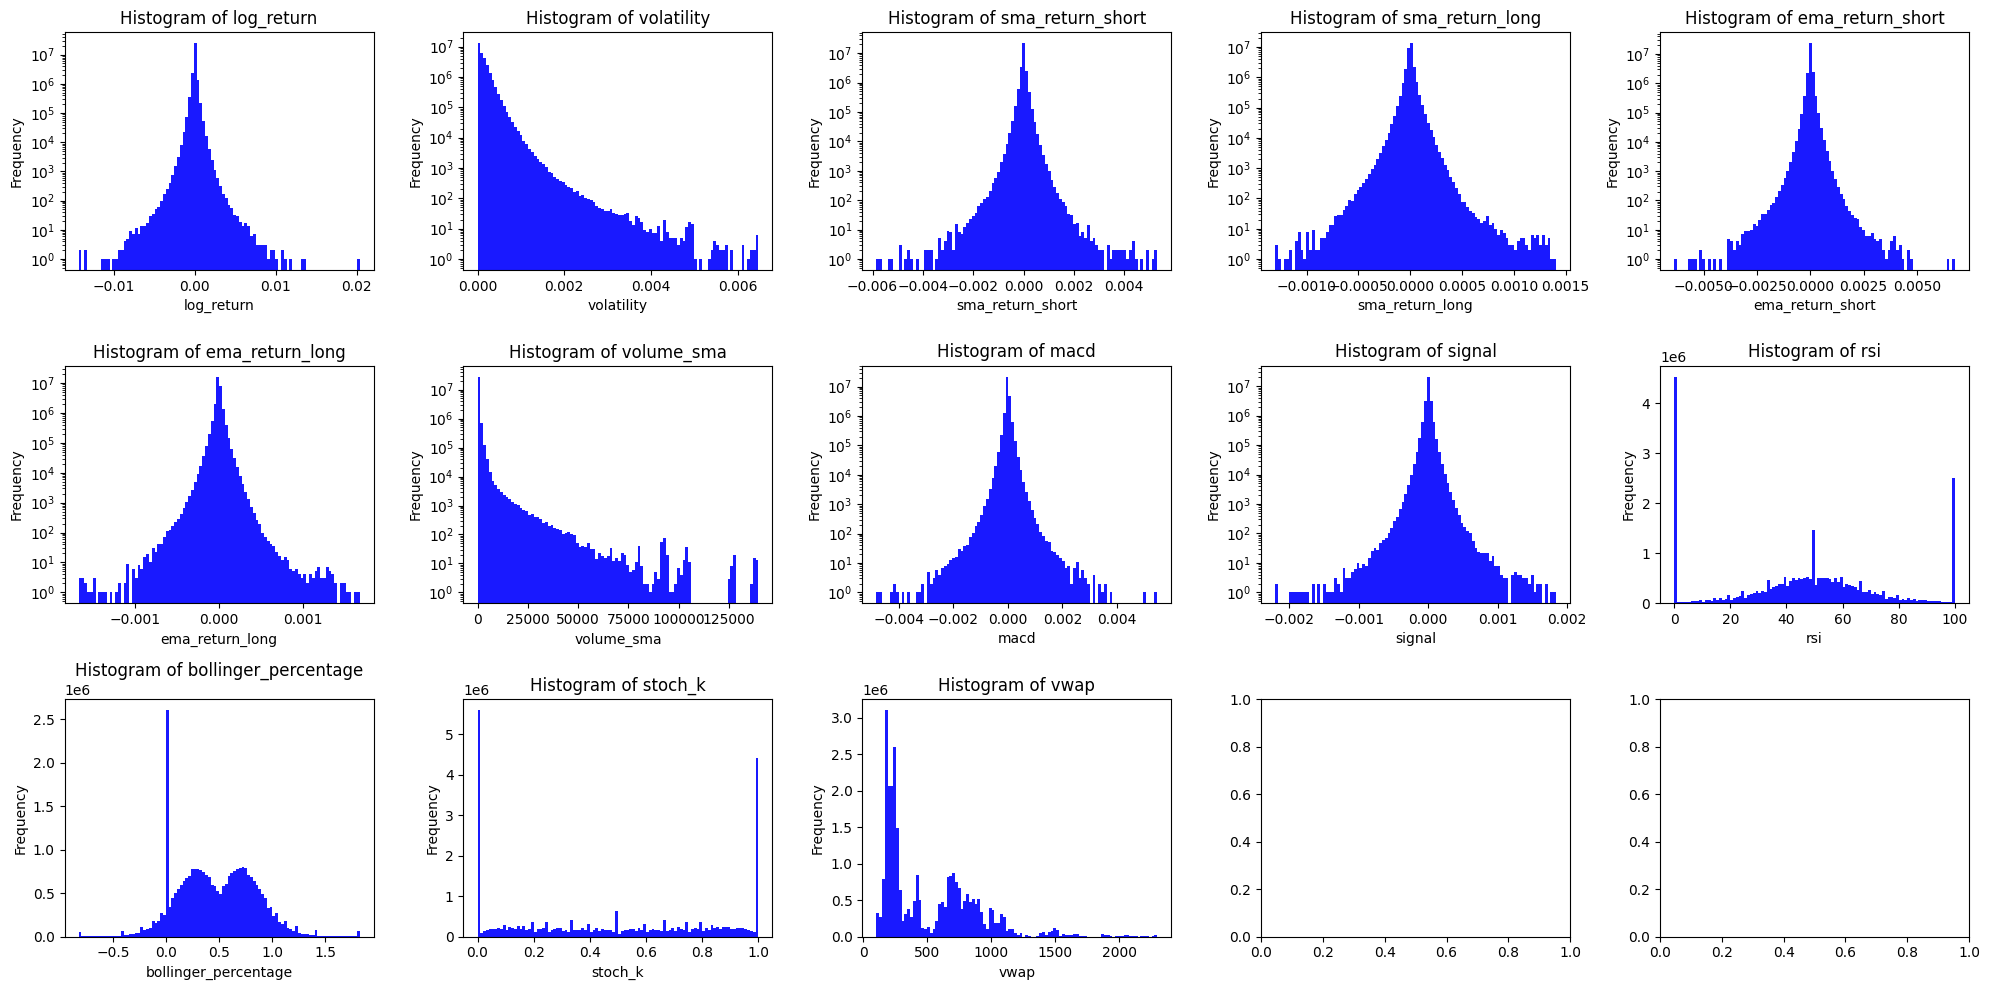

In [16]:
cols = [
    'log_return',
    'volatility',
    'sma_return_short',
    'sma_return_long',
    'ema_return_short',
    'ema_return_long',
    'volume_sma',
    'macd',
    'signal',
    'rsi',
    'bollinger_percentage',
    'stoch_k',
    'vwap',
]

to_log = [
    'log_return',
    'volatility',
    'sma_return_short',
    'sma_return_long',
    'ema_return_short',
    'ema_return_long',
    'volume_sma',
    'macd',
    'signal',
]

fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.flatten()

for idx, col in enumerate(cols):
    axes[idx].hist(all_data[col], bins=100, color='blue', alpha=0.9)
    axes[idx].set_title(f'Histogram of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    if col in to_log:
        axes[idx].set_yscale('log')

plt.tight_layout()
plt.show()

In [17]:
print(f"Minimum volume per seconds: {all_data['volume'].min()}")
print(f"Average volume per seconds: {all_data['volume'].mean()}")
print(f"Maximum volume per seconds: {all_data['volume'].max()}\n")

Minimum volume per seconds: 0.0
Average volume per seconds: 233.0476850418537
Maximum volume per seconds: 3984492.0

